In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Amazon Sales Data

In [25]:
# Uploading data set
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [26]:
df.shape

(1465, 16)

In [27]:
df['rating'].sort_values(ascending= False).reset_index()

,index,rating
0,1279,|
1,324,5.0
2,174,5.0
3,775,5.0
4,1201,4.8
...,...,...
1460,545,2.8
1461,1286,2.8
1462,1356,2.6
1463,1243,2.3


In [28]:
df['discounted_price(₹)'] = df['discounted_price'].str.replace('₹','').str.replace(",", '')
df['discounted_price(₹)'] = df['discounted_price(₹)'].astype(float)
df['actual_price(₹)'] = df['actual_price'].str.replace('₹','').str.replace(",",'')
df['actual_price(₹)'] = df['actual_price(₹)'].astype(float)
df['discount_percentage(%)'] = df['discount_percentage'].str.replace('%','')
df['discount_percentage(%)'] = df['discount_percentage(%)'].astype(float)
df['rating'] = df['rating'].str.replace('|','4.8')
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].str.replace(',','')
df['rating_count'] = df['rating_count'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              1465 non-null   object 
 1   product_name            1465 non-null   object 
 2   category                1465 non-null   object 
 3   discounted_price        1465 non-null   object 
 4   actual_price            1465 non-null   object 
 5   discount_percentage     1465 non-null   object 
 6   rating                  1465 non-null   float64
 7   rating_count            1463 non-null   float64
 8   about_product           1465 non-null   object 
 9   user_id                 1465 non-null   object 
 10  user_name               1465 non-null   object 
 11  review_id               1465 non-null   object 
 12  review_title            1465 non-null   object 
 13  review_content          1465 non-null   object 
 14  img_link                1465 non-null   

###  **1. What is the average rating for each product category ?**

                                               category  \
217   Computers&Accessories|Accessories&Peripherals|...   
109   Computers&Accessories|Accessories&Peripherals|...   
120   Computers&Accessories|Accessories&Peripherals|...   
1014  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1261  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
960   Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
1050  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1035  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
946   Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   

                                           product_name  rating  
217   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0  
109   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0  
120   Syncwire LTG to USB Cable for Fast Charging Co...     5.0  
1014  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8  
1261  Eureka Forbes 

<Figure size 800x600 with 0 Axes>

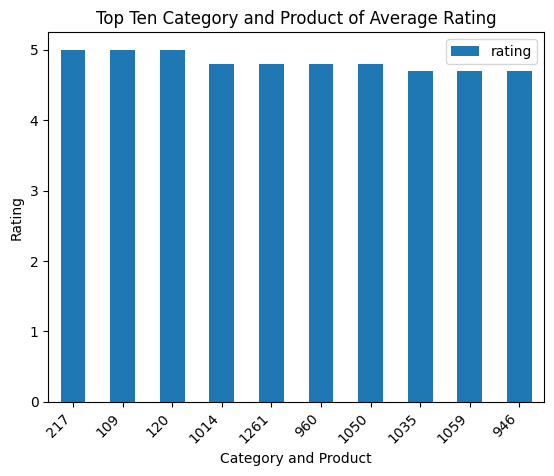

OBSERVATION OR INSIGHTS
You can match the x-axis number with the category and product number both are same so you can see the rating by matching its number
You can see that the 3 index (120,109,217) have 5 rating
so you can say that three product are better than others in rating


In [30]:
# Average rating by product and Category
avg_rating_by_procat = df.groupby(['category','product_name'])['rating'].mean().reset_index()

# Top ten average rating product and category
top_ten_avg_rating = avg_rating_by_procat.sort_values(by='rating',ascending= False).head(10)
print(top_ten_avg_rating)


# Plotting into the bar graph
plt.figure(figsize= (8,6))
top_ten_avg_rating.plot(kind='bar')
plt.xlabel("Category and Product")
plt.ylabel("Rating")
plt.title("Top Ten Category and Product of Average Rating")
plt.xticks(rotation= 45, ha= 'right')
plt.show()


# Observation or Insights
print("OBSERVATION OR INSIGHTS")
print("You can match the x-axis number with the category and product number both are same so you can see the rating by matching its number")
print("You can see that the 3 index (120,109,217) have 5 rating")
print("so you can say that three product are better than others in rating")

#  **2. What are the top rating_count products by category ?**


                                              category  \
517  Electronics|HomeTheater,TV&Video|Accessories|C...   
523  Electronics|HomeTheater,TV&Video|Accessories|C...   
516  Electronics|HomeTheater,TV&Video|Accessories|C...   
522  Electronics|HomeTheater,TV&Video|Accessories|C...   
474  Electronics|Headphones,Earbuds&Accessories|Hea...   
475  Electronics|Headphones,Earbuds&Accessories|Hea...   
472  Electronics|Headphones,Earbuds&Accessories|Hea...   
769  Electronics|Mobiles&Accessories|Smartphones&Ba...   
771  Electronics|Mobiles&Accessories|Smartphones&Ba...   
772  Electronics|Mobiles&Accessories|Smartphones&Ba...   

                                          product_name  rating_count  count  
517  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0      1  
523  AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0      1  
516  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0      1  
522  AmazonBasics Flexible Premium HDMI Cable (Bl

<Figure size 800x600 with 0 Axes>

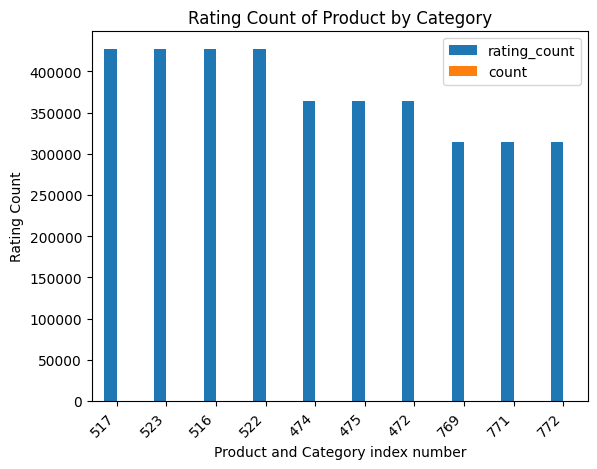

Observation and Insights
You can match the x-axis with the index number of product and category both are same so can categories by index
You can see that the rating count of index(523,517,516,522) are almost same so yo can say that 4 product have highest index


In [31]:
# Categories product and category by rating count
avg_rating_count_by_procat = df.groupby(['category','product_name'])['rating_count'].value_counts().reset_index()
top_ten_rating_count = avg_rating_count_by_procat.sort_values(by= 'rating_count',ascending= False).head(10)
print(top_ten_rating_count)

# Plotting into the bar graph
plt.figure(figsize= (8,6))
top_ten_rating_count.plot(kind='bar')
plt.xlabel("Product and Category index number")
plt.ylabel("Rating Count")
plt.title("Rating Count of Product by Category")
plt.xticks(rotation= 45, ha= 'right')
plt.show()


# Observation and Insights
print("Observation and Insights")
print("You can match the x-axis with the index number of product and category both are same so can categories by index")
print("You can see that the rating count of index(523,517,516,522) are almost same so yo can say that 4 product have highest index")


# 3. What is the distribution of discounted prices vs. actual prices?

In [32]:
import plotly.express as px

# Create a scatter plot with Plotly
fig = px.scatter(df, x='actual_price(₹)', y='discounted_price(₹)', title='Distribution of Discounted Prices vs. Actual Prices',
                 labels={'actual_price': 'Actual Price', 'discounted_price': 'Discounted Price'})

# Show the plot
fig.show()


# 4. How does the average discount percentage vary across categories?

                                              category  discount_percentage(%)
6    Computers&Accessories|Accessories&Peripherals|...                    90.0
75   Electronics|Headphones,Earbuds&Accessories|Ear...                    90.0
106  Electronics|Mobiles&Accessories|MobileAccessor...                    90.0
73   Electronics|Headphones,Earbuds&Accessories|Ada...                    88.0
14   Computers&Accessories|Accessories&Peripherals|...                    87.5
110  Electronics|Mobiles&Accessories|MobileAccessor...                    82.0
36   Computers&Accessories|Components|InternalHardD...                    80.0
1    Computers&Accessories|Accessories&Peripherals|...                    78.5
114  Electronics|Mobiles&Accessories|MobileAccessor...                    76.4
74    Electronics|Headphones,Earbuds&Accessories|Cases                    76.0


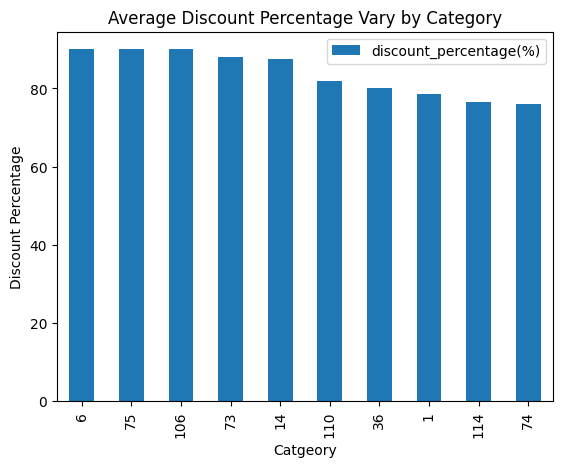

Observation OR Insights
You can match the x-axis number with index number of the catgeory so can distinguished it as catgeory
You can see that the first three catgeory have highest discount than other product


In [33]:
# Top ten category by discount percentage
avg_disc_per_by_cat = df.groupby(['category'])['discount_percentage(%)'].mean().reset_index().sort_values(by= 'discount_percentage(%)', ascending= False).head(10)
print(avg_disc_per_by_cat)

# Plot into the graph
avg_disc_per_by_cat.plot(kind= 'bar')
plt.xlabel("Catgeory")
plt.ylabel("Discount Percentage")
plt.title("Average Discount Percentage Vary by Category")
plt.show()


# Observation and Insights
print("Observation OR Insights")
print("You can match the x-axis number with index number of the catgeory so can distinguished it as catgeory")
print("You can see that the first three catgeory have highest discount than other product")

# 5. What are the most popular product names?

Top 10 Most Popular Product Names:
                                        Product Name  Frequency
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...          5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...          4
2  Amazonbasics Nylon Braided Usb-C To Lightning ...          3
3  Duracell USB Lightning Apple Certified (Mfi) B...          3
4        Flix Micro Usb Cable For Smartphone (Black)          3
5  Fire-Boltt India's No 1 Smartwatch Brand Talk ...          3
6  Wayona Nylon Braided USB to Lightning Fast Cha...          3
7  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...          3
8  Sounce Fast Phone Charging Cable & Data Sync U...          3
9  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...          3


<Figure size 800x600 with 0 Axes>

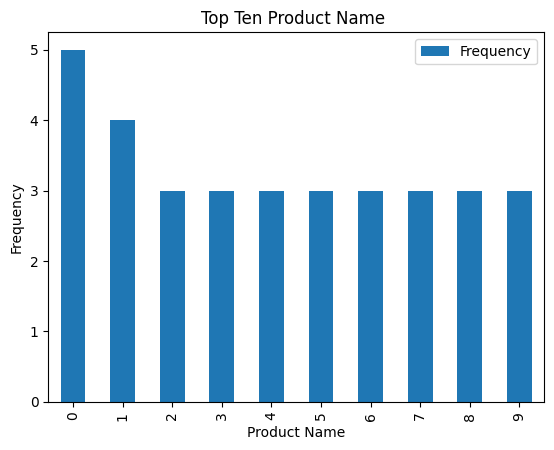

Top ten popular product
Tht 1st poduct is more popular than other product so that its frequency is higher than others frequency


In [34]:
# Count the occurrences of each product name
popular_product_names = df['product_name'].value_counts().reset_index().head(10)

# Rename the columns for clarity
popular_product_names.columns = ['Product Name', 'Frequency']

# Print or display the top 10 most popular product names
print("Top 10 Most Popular Product Names:")
print(popular_product_names.head(10))

plt.figure(figsize= (8,6))
popular_product_names.plot(kind='bar')
plt.ylabel("Frequency")
plt.xlabel("Product Name")
plt.title("Top Ten Product Name ")
plt.show()


# OBSERVATION OR INSIGHTS
print("Top ten popular product")
print("Tht 1st poduct is more popular than other product so that its frequency is higher than others frequency")


# 6. What are the most popular product keywords?

In [35]:
from collections import Counter

# Extract keywords from product names
keywords = ' '.join(df['product_name']).split()

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

# Convert the counter to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency'])

# Sort the DataFrame by frequency in descending order
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

# Print or display the top 10 most popular keywords
print("Top 10 Most Popular Product Keywords:")
print(keyword_df.head(10))

Top 10 Most Popular Product Keywords:
      Keyword  Frequency
71       with        718
13        for        614
211         |        457
43          &        432
3         USB        342
8         and        310
11      Cable        306
113         -        220
7    Charging        212
6        Fast        208


# 7. What are the most popular product reviews?

In [36]:

popular_reviews = df['review_content'].value_counts().reset_index().head(10)

# Rename the columns for clarity
popular_reviews.columns = ['Review', 'Frequency']

# Print or display the top 10 most popular product reviews
print("Top 10 Most Popular Product Reviews:")
print(popular_reviews)


Top 10 Most Popular Product Reviews:
                                              Review  Frequency
0  I am not big on camera usage, personally. I wa...          8
1  Good product,long wire,Charges good,Nice,I bou...          7
2  I ordered this cable to connect my phone to An...          7
3  Worked on iPhone 7 and didn’t work on iPhone X...          7
4  I purchased the 6/128gb variant.To sum  it up ...          6
5  128GB SD Card is showing 134GBDon't buy this p...          6
6  Everything is fine but it is bulky and hard, i...          5
7  Good budget mfi certified lightly cable for th...          5
8  About the TV - Wonderful----------------------...          5
9  I liked it, worth the money, light weight and ...          5


# 8. What is the correlation between discounted_price and rating?

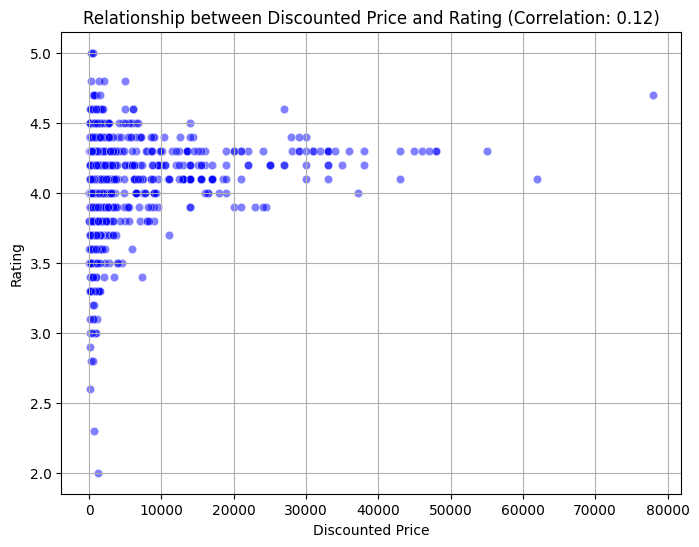

Correlation between Discounted Price and Rating: 0.11985513917356677
So this is positive correlation
1 indicates a perfect positive correlation
-1 indicates a perfect negative correlation, and
0 indicates no correlation.


In [37]:
correlation_of_dis_rat = df['discounted_price(₹)'].corr(df['rating'])

# Plotting the relationship between 'discounted_price' and 'rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discounted_price(₹)', y='rating', color='blue', alpha=0.5)
plt.title('Relationship between Discounted Price and Rating (Correlation: {:.2f})'.format(correlation_of_dis_rat))
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

print("Correlation between Discounted Price and Rating:", correlation_of_dis_rat)
print("So this is positive correlation")

# Observation OR Insights
print("1 indicates a perfect positive correlation\n-1 indicates a perfect negative correlation, and\n0 indicates no correlation.")

# 9. What are the Top 5 categories based on the highest ratings?

Top Five Catgeory by rating
                                               category  rating
10   Computers&Accessories|Accessories&Peripherals|...   967.4
119        Electronics|WearableTechnology|SmartWatches   305.9
117  Electronics|Mobiles&Accessories|Smartphones&Ba...   278.8
97   Electronics|HomeTheater,TV&Video|Televisions|S...   265.2
76   Electronics|Headphones,Earbuds&Accessories|Hea...   202.7


<Figure size 800x600 with 0 Axes>

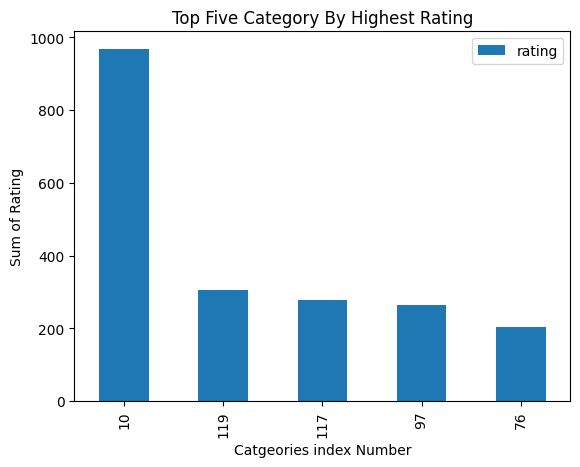


Observation or Insights
You can see the category name by matching index number
You can see that 10 number index have a highest rating


In [38]:
top_5_category = df.groupby(['category'])['rating'].sum().reset_index()
top_five_catgeory = top_5_category.sort_values(by= 'rating', ascending= False).head(5)
print("Top Five Catgeory by rating\n", top_five_catgeory)


# Plotting into the Graph
plt.figure(figsize= (8,6))
top_five_catgeory.plot(kind= 'bar')
plt.ylabel("Sum of Rating")
plt.xlabel("Catgeories index Number")
plt.title("Top Five Category By Highest Rating")
plt.show()

# Observation Or Insights
print("\nObservation or Insights")
print("You can see the category name by matching index number")
print("You can see that 10 number index have a highest rating")

### 10. Identify any potential areas for improvement or optimization based on the data analysis.
 --> : There are two missing values in the 'rating_count' column. Depending on the significance of this information, you may need to handle these missing values and can be hadle with median, mean.Ensure that the data types are appropriate for each column.

 # "Spotify Data: Popular Hip-hop Artists and Tracks" Dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary

In [40]:
# Upload Dataset

sf = pd.read_csv('spotify.csv')
sf.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [41]:
sf.shape

(440, 5)

In [42]:
# Checking Missing Values

sf.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [43]:
# Checking Duplicates
print("Number of duplicated rows ",sf.duplicated().sum())
print("\n")
# Displaying only duplicated rows
duplicate_rows = sf[sf.duplicated()]
duplicate_rows


Number of duplicated rows  27




,Artist,Track Name,Popularity,Duration (ms),Track ID
39,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
52,Travis Scott,TELEKINESIS (feat. SZA & Future),86,353754,1i9lZvlaDdWDPyXEE95aiq
72,21 Savage,née-nah,88,220584,2yUzr8Sr6ldG8vmHhZwTnz
73,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
76,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N
131,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
170,Metro Boomin,Trance (with Travis Scott & Young Thug),89,194786,5wG3HvLhF6Y5KTGlK0IW3J
182,D-Block Europe,Overseas,74,222154,337kcYVjYXdLBItCw9ry3b
210,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,87,157560,0RiRZpuVRbi7oqRdSMwhQY
212,Metro Boomin,Annihilate (Spider-Man: Across the Spider-Vers...,79,231746,39MK3d3fonIP8Mz9oHCTBB


In [44]:
# Removing Duplicate Row
dropped_duplicated = sf.drop_duplicates()
# dropped_duplicated
print("Datframe after removing duplicates \n")
dropped_duplicated

Datframe after removing duplicates 



,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


### 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

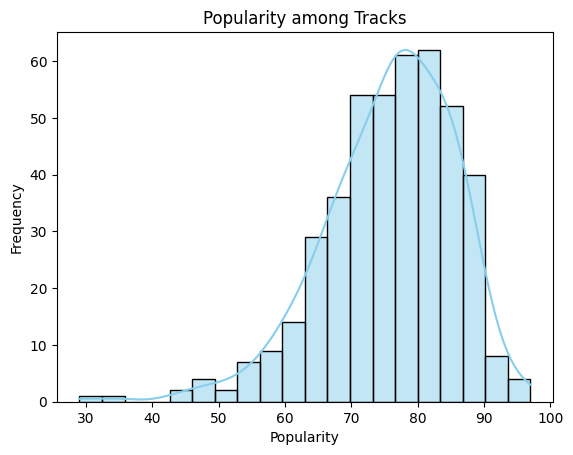

In [45]:
sns.histplot(sf['Popularity'], kde=True, color='skyblue', bins=20)
plt.title("Popularity among Tracks")
plt.ylabel("Frequency")
plt.xlabel("Popularity")
plt.show()

In [46]:
sf.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

###  3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

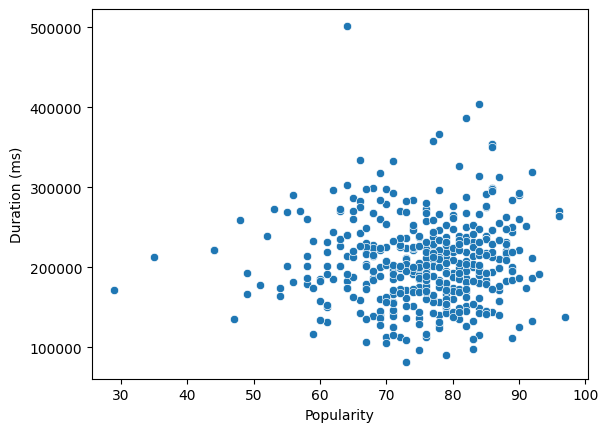

In [47]:
sns.scatterplot(x=sf['Popularity'], y=sf['Duration (ms)'])
plt.show()

The relation between Popularity and the Duration is that we can see that 60 to 90 is the highest popularity which duration is around 150000ms to 300000ms.And one Popularity is near about 65 and its duration is highest among all i.e. is 500000.

###  4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

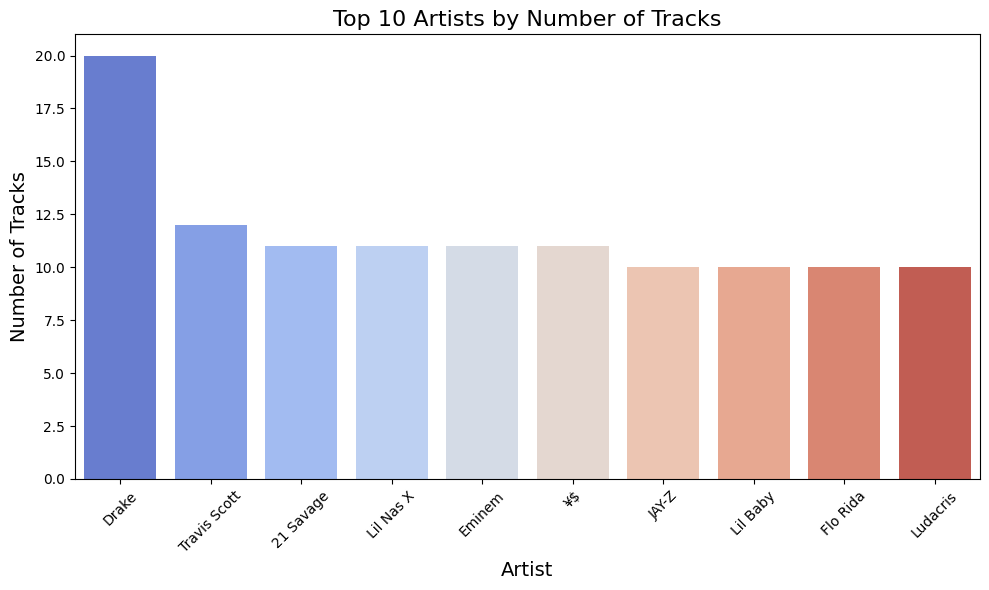

In [48]:
# Counting the number of tracks for each artist
artist_track_counts = sf['Artist'].value_counts().head(10).index

# Filtering the DataFrame to keep only the top 10 artists
top_10_df = sf[sf['Artist'].isin(artist_track_counts)]

# Plotting the count of tracks for the top 10 artists using countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=top_10_df, order=top_10_df['Artist'].value_counts().index, palette='coolwarm')

# Customizing the plot
plt.title('Top 10 Artists by Number of Tracks', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45)  # Rotate artist names for better readability

# Show the plot
plt.tight_layout()
plt.show()

### 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [49]:
# Sorting the dataset by the 'Popularity' column in ascending order to get the least popular tracks
least_popular_tracks = sf[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=True)
# Selecting the top 5 least popular tracks
top_5_least_popular_tracks = least_popular_tracks.head(5)
print(top_5_least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


### 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

Average Popularity for Each Artist:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Artist with the Highest Average Popularity: cassö


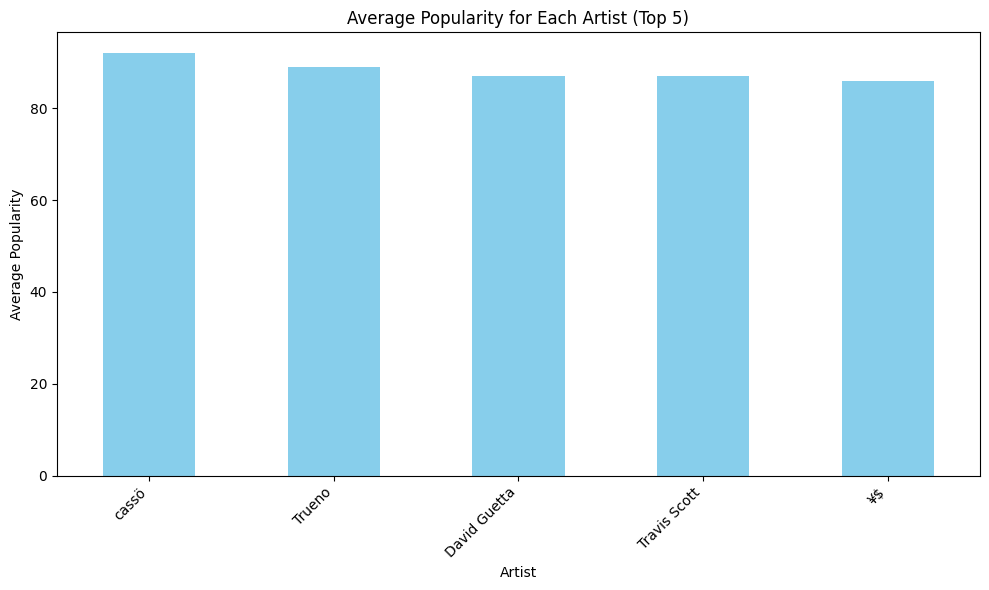

In [50]:
# Get the top 5 most popular artists
top_5_most_popular_artists = sf.groupby('Artist')['Popularity'].mean().nlargest(5)

# Display the average popularity for each artist
print("Average Popularity for Each Artist:")
print(top_5_most_popular_artists)

# Find the artist with the highest average popularity
artist_highest_avg_popularity = top_5_most_popular_artists.idxmax()

# Display the artist with the highest average popularity
print("\nArtist with the Highest Average Popularity:", artist_highest_avg_popularity)

# Plotting into gaph
# Plotting the average popularity for each artist
plt.figure(figsize=(10, 6))
top_5_most_popular_artists.plot(kind='bar', color='skyblue')
plt.title('Average Popularity for Each Artist (Top 5)')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [51]:
# 1. Group by 'Artist' and calculate the total popularity for each artist
artist_total_popularity = sf.groupby('Artist')['Popularity'].sum().reset_index(name='Total Popularity')

# 2. Sort the artists by their total popularity in descending order and select the top 5
top_5_artists = artist_total_popularity.sort_values(by='Total Popularity', ascending=False).head(5)

# 3. For each artist, find their most popular track
most_popular_tracks = []
for artist in top_5_artists['Artist']:
    # Filter the dataframe for the current artist
    artist_tracks = sf[sf['Artist'] == artist]
    
    # Find the track with the maximum popularity for that artist
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    
    # Append the result to the list
    most_popular_tracks.append({'Artist': artist, 'Most Popular Track': most_popular_track})

# Convert the results into a DataFrame for display
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

# 4. Display the result
print("Most popular tracks for the top 5 most popular artists:\n")
print(most_popular_tracks_df)


Most popular tracks for the top 5 most popular artists:

         Artist                       Most Popular Track
0         Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)
1  Travis Scott               FE!N (feat. Playboi Carti)
2            ¥$                                 CARNIVAL
3     21 Savage                                   redrum
4        Eminem                               Without Me


In [52]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


### 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

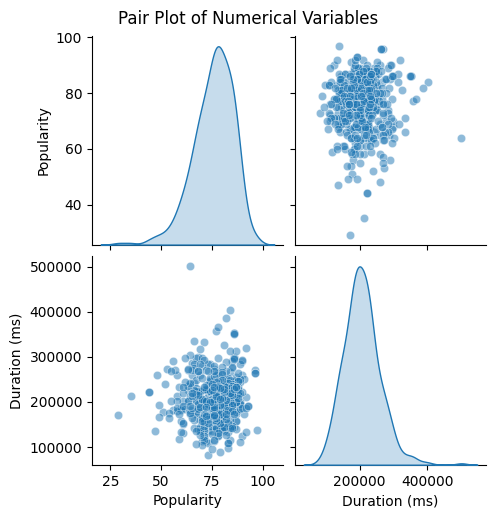

In [53]:
numerical_column = ['Popularity', 'Duration (ms)']
# 2. Creating the pair plot
sns.pairplot(sf[numerical_column], diag_kind='kde', plot_kws={'alpha':0.5})

# 3. Show the plot
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)  # Adjust title position slightly
plt.show()

###  9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.



##### Box Plot

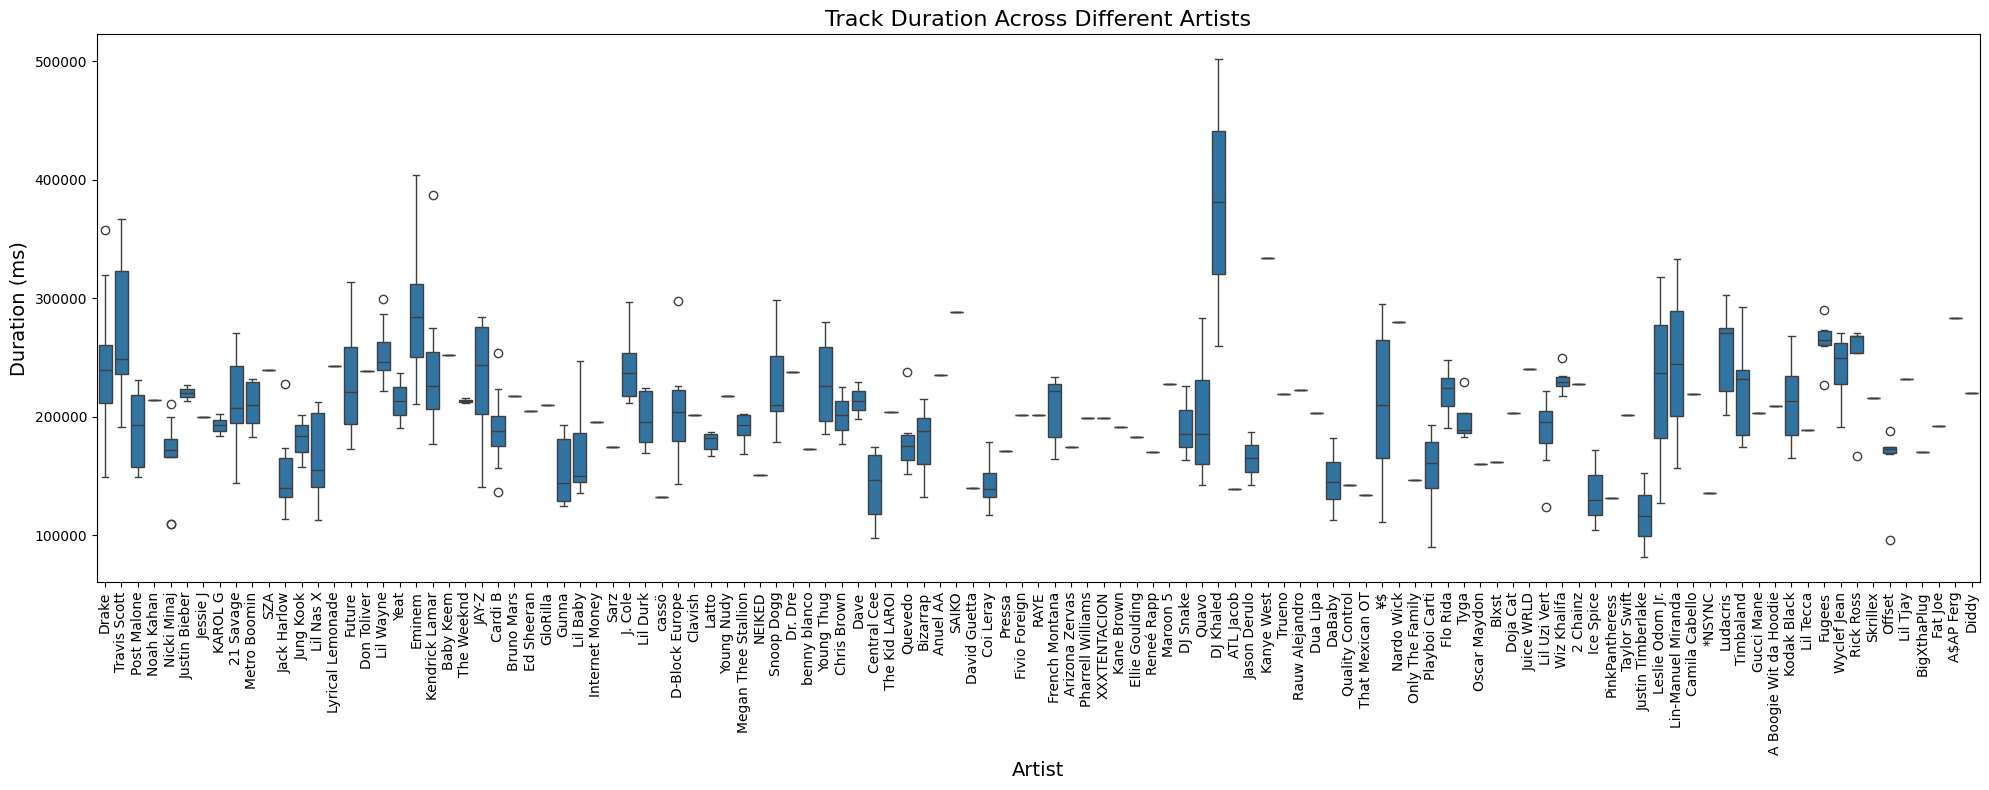

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Creating a box plot to visualize track duration variation across artists
plt.figure(figsize=(20, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=sf)

# 2. Customizing the plot
plt.title('Track Duration Across Different Artists', fontsize=16)
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# 3. Show the plot
plt.tight_layout()
plt.show()


##### Voilin Plot

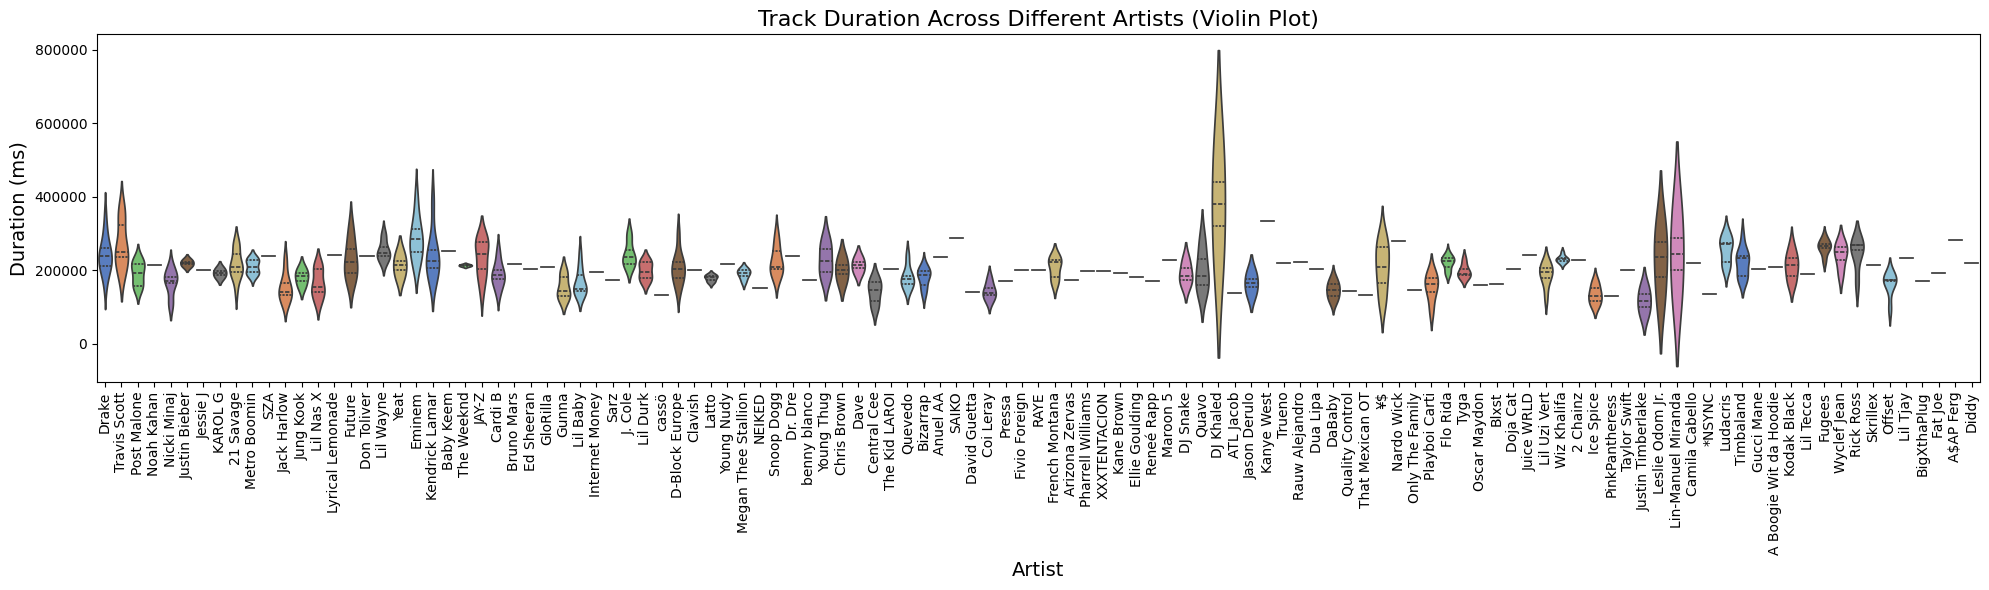

In [55]:
# 1. Creating a violin plot to visualize track duration variation across artists
plt.figure(figsize=(20, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=sf, inner='quartile', palette='muted')

# 2. Customizing the plot
plt.title('Track Duration Across Different Artists (Violin Plot)', fontsize=16)
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# 3. Show the plot
plt.tight_layout()
plt.show()


###  10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

##### Swarm Plot

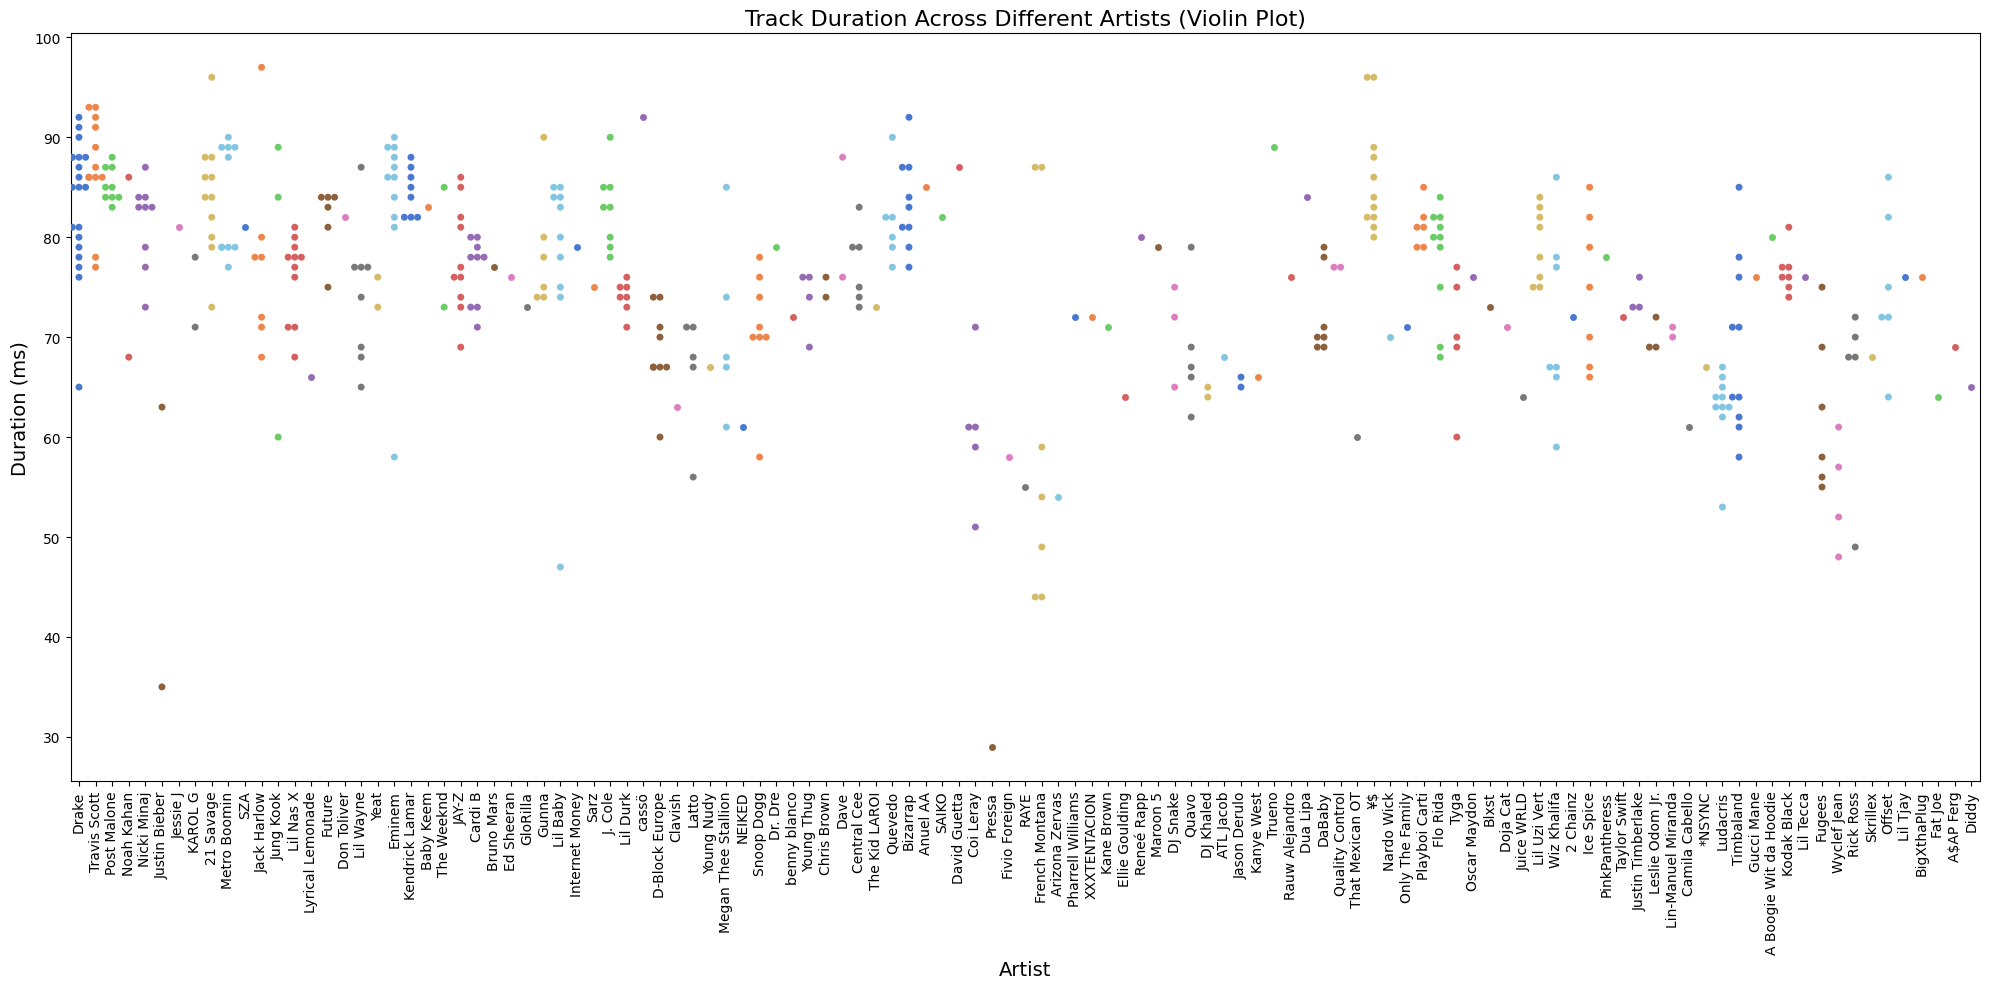

In [56]:
# 1. Creating a violin plot to visualize track duration variation across artists
plt.figure(figsize=(20, 10))
sns.swarmplot(x='Artist', y='Popularity', data=sf, palette='muted')

# 2. Customizing the plot
plt.title('Track Duration Across Different Artists (Violin Plot)', fontsize=16)
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# 3. Show the plot
plt.tight_layout()
plt.show()

##### Voilin Plot

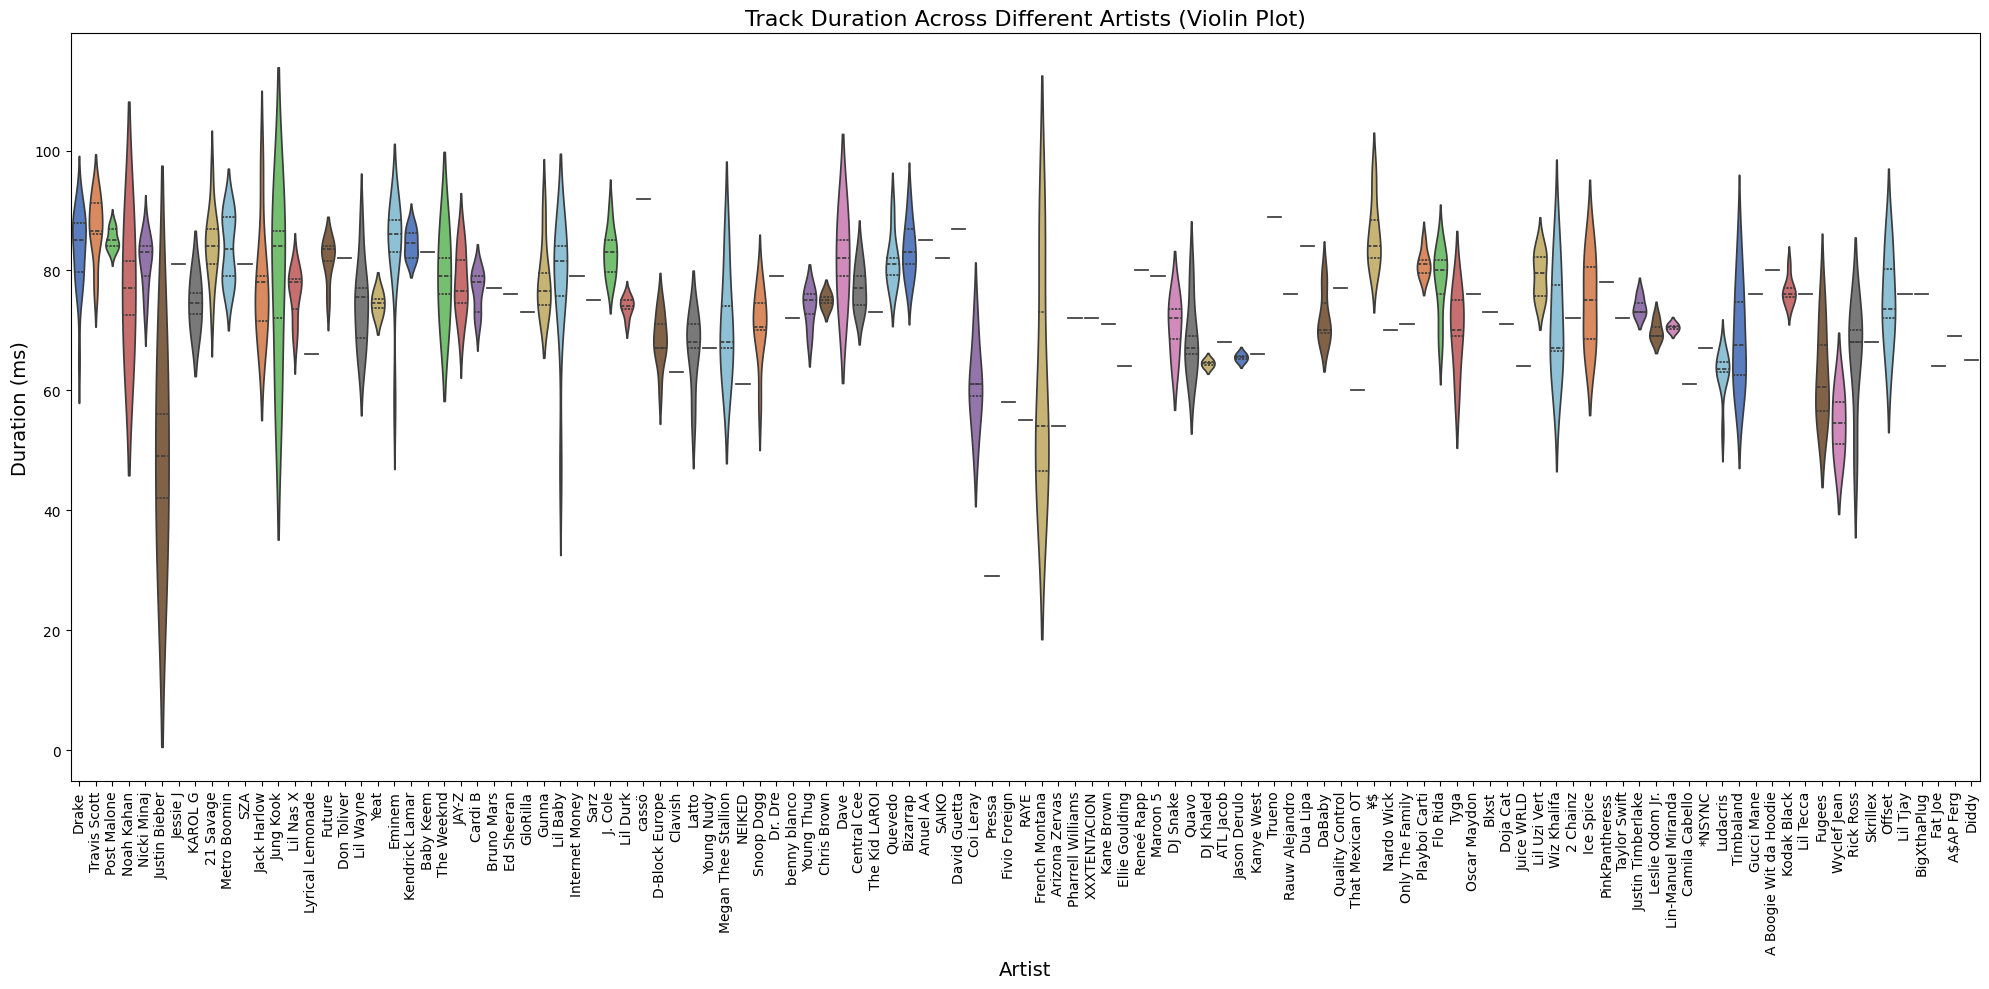

In [57]:
# 1. Creating a violin plot to visualize track duration variation across artists
plt.figure(figsize=(20, 10))
sns.violinplot(x='Artist', y='Popularity', data=sf, inner='quartile', palette='muted')

# 2. Customizing the plot
plt.title('Track Duration Across Different Artists (Violin Plot)', fontsize=16)
plt.xticks(rotation=90)  # Rotate artist names for readability
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# 3. Show the plot
plt.tight_layout()
plt.show()